<a href="https://colab.research.google.com/github/Heleena-pilli/Heleena-pilli/blob/main/Ecommercecustomersegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**
As an e-commerce platform, it is very important to profile your customers, dividing your clientele base into groups based on their needs and expectations. Grouping will help us come up with dedicated marketing strategies and will aid us in recommending products to different user bases. In this project, we are interested in analyzing the content of an E-commerce database that lists purchases made by ∼4000 customers over a period of one year (1/12/2010 to 9/12/2011). Based on this analysis, we would like to develop models to group the 4000 customers into different buckets. Such a model must take into account the similarity between the products purchased between the users (i.e. a user might purchase 2 different products which are very similar to each other), the spending patterns of a user, their meta information, etc. 



IMPORT NECESSARY PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Import the dataset


In [2]:
df=pd.read_csv("/content/sample_data/data.csv",encoding="unicode_escape")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Using the description column to find product categories

In [5]:
df["Description"].shape

(541909,)

In [6]:
df["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [7]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Dropping null values

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(406829, 8)

To find the product categories, text values from description column are converted to numerical data using NLP

In [10]:
df_desc=pd.DataFrame(df["Description"].unique()).rename(columns={0:"Description"})
print(df_desc.shape)
print(df_desc)

(3896, 1)
                              Description
0      WHITE HANGING HEART T-LIGHT HOLDER
1                     WHITE METAL LANTERN
2          CREAM CUPID HEARTS COAT HANGER
3     KNITTED UNION FLAG HOT WATER BOTTLE
4          RED WOOLLY HOTTIE WHITE HEART.
...                                   ...
3891            LETTER "W" BLING KEY RING
3892            LETTER "Z" BLING KEY RING
3893       PINK CRYSTAL SKULL PHONE CHARM
3894   CREAM HANGING HEART T-LIGHT HOLDER
3895          PAPER CRAFT , LITTLE BIRDIE

[3896 rows x 1 columns]


Replacing punctuations and other special charecters with space

In [11]:
df_desc["Description"]=df_desc["Description"].str.replace("[^a-zA-Z0-9]", " ")

In [12]:
df_desc["Description"]

0        WHITE HANGING HEART T LIGHT HOLDER
1                       WHITE METAL LANTERN
2            CREAM CUPID HEARTS COAT HANGER
3       KNITTED UNION FLAG HOT WATER BOTTLE
4            RED WOOLLY HOTTIE WHITE HEART 
                       ...                 
3891              LETTER  W  BLING KEY RING
3892              LETTER  Z  BLING KEY RING
3893         PINK CRYSTAL SKULL PHONE CHARM
3894     CREAM HANGING HEART T LIGHT HOLDER
3895            PAPER CRAFT   LITTLE BIRDIE
Name: Description, Length: 3896, dtype: object

Removing short words

In [13]:
df_desc["Description"]=df_desc["Description"].apply(lambda row:' '.join([word for word in row.split() if len(word)>2]))
df_desc["Description"]

0          WHITE HANGING HEART LIGHT HOLDER
1                       WHITE METAL LANTERN
2            CREAM CUPID HEARTS COAT HANGER
3       KNITTED UNION FLAG HOT WATER BOTTLE
4             RED WOOLLY HOTTIE WHITE HEART
                       ...                 
3891                  LETTER BLING KEY RING
3892                  LETTER BLING KEY RING
3893         PINK CRYSTAL SKULL PHONE CHARM
3894       CREAM HANGING HEART LIGHT HOLDER
3895              PAPER CRAFT LITTLE BIRDIE
Name: Description, Length: 3896, dtype: object

Converting into lowercase

In [14]:
df_desc["Description"]=[review.lower() for review in df_desc["Description"]]
df_desc["Description"]

0          white hanging heart light holder
1                       white metal lantern
2            cream cupid hearts coat hanger
3       knitted union flag hot water bottle
4             red woolly hottie white heart
                       ...                 
3891                  letter bling key ring
3892                  letter bling key ring
3893         pink crystal skull phone charm
3894       cream hanging heart light holder
3895              paper craft little birdie
Name: Description, Length: 3896, dtype: object

Removing stop words

In [15]:
from nltk import word_tokenize
stop_words = stopwords.words('english')

add_words = ['pack','set', 'small', 'large', 'jumbo', 'pink', 'blue', 'tag', 'red', 'white', 'green', 'black', 'purple']

stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df_desc["Description"] = [remove_stopwords(r) for r in df_desc["Description"]]

In [16]:
df_desc['Description'].unique()

array(['hanging heart light holder', 'metal lantern',
       'cream cupid hearts coat hanger', ..., 'crystal skull phone charm',
       'cream hanging heart light holder', 'paper craft little birdie'],
      dtype=object)

In [17]:
nltk 

<module 'nltk' from '/usr/local/lib/python3.8/dist-packages/nltk/__init__.py'>

In [18]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Lemmatization

In [19]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

#function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
      return wordnet.ADJ
  elif nltk_tag.startswith('V'):
      return wordnet.VERB
  elif nltk_tag.startswith('N'):
      return wordnet.NOUN
  elif nltk_tag.startswith('R'):
      return wordnet.ADV
  else:
      return None

def lemmatize_sentence(sentence):
  nltk_tagged=nltk.pos_tag(nltk.word_tokenize(sentence))
  wordnet_tagged = map(lambda x: (x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)
  lemmatized_sentence = []
  for word,tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return  " ".join(lemmatized_sentence)

df_desc['Description']=df_desc['Description'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [20]:
df_desc['Description']

0                hang heart light holder
1                          metal lantern
2          cream cupid heart coat hanger
3       knit union flag hot water bottle
4                    woolly hottie heart
                      ...               
3891               letter bling key ring
3892               letter bling key ring
3893           crystal skull phone charm
3894       cream hang heart light holder
3895           paper craft little birdie
Name: Description, Length: 3896, dtype: object

Extracting words and frequency and plotting top 30 frequent words

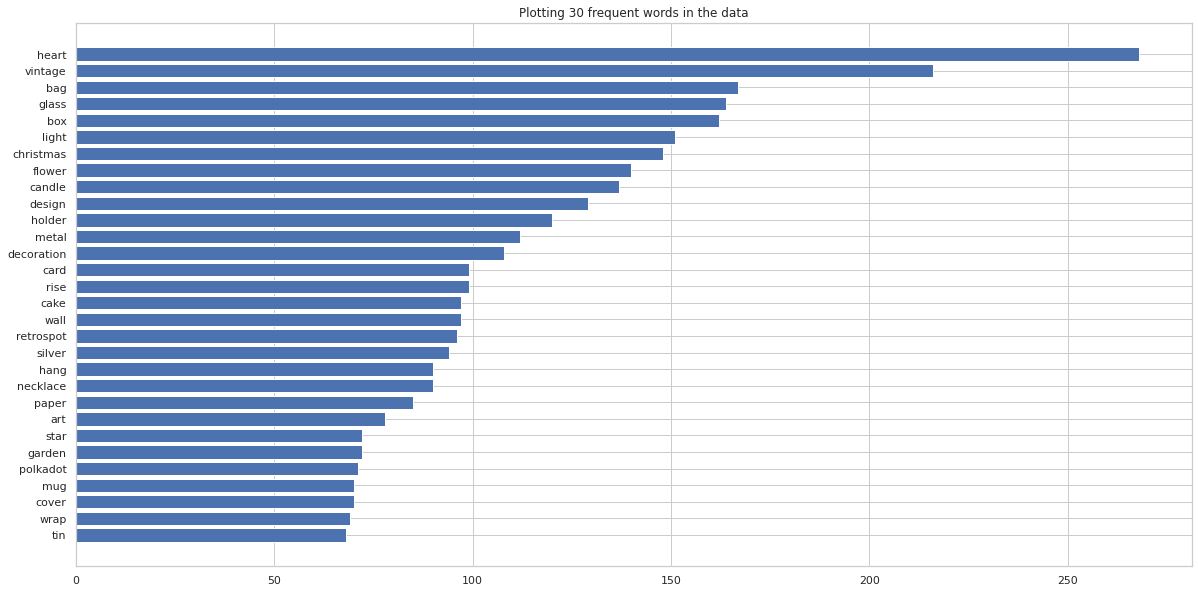

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
from nltk import FreqDist

all_words_products = df_desc['Description']

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_products])
all_words = all_words.split()
words_df=FreqDist(all_words)

#Extracting and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()),'count':list(words_df.values())})
words_df
#subsets top 30 words by frequency
words_df = words_df.nlargest(columns='count', n=30)

words_df.sort_values('count',inplace=True)

#plotting 30 frequent words
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'],width=words_df['count'])
plt.title('Plotting 30 frequent words in the data')
plt.show()

Word cloud

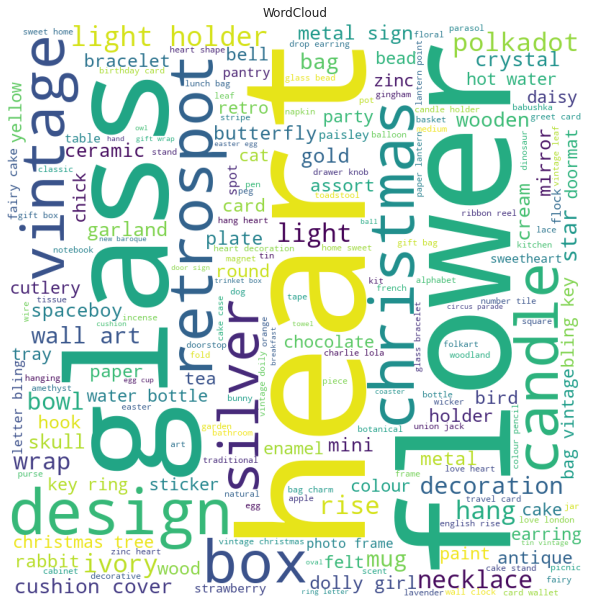

In [22]:
import wordcloud
from wordcloud import WordCloud 
word_cloud_df=df_desc['Description']
all_words = ' '.join([text for text in word_cloud_df])


wordcloud=WordCloud(width = 800, height = 800,
                    background_color= 'white',
                    min_font_size= 10).generate(all_words)


#plot the wordcloud image
plt.figure(figsize = (8,8), facecolor= None )
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title('WordCloud')
plt.show()

Bag of words model

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

#Creating sparse matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
data_Description = tfidf.fit_transform(df_desc['Description']).toarray()
featureNames = tfidf.get_feature_names()


In [24]:
data_Description

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
data_Description.shape

(3896, 1739)

Calculating Silhouette_score

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

For n_cluters = 4 The average silhouette_score is : 0.011253976736163017
For n_cluters = 5 The average silhouette_score is : 0.012740567191809571
For n_cluters = 6 The average silhouette_score is : 0.014509239937570657
For n_cluters = 7 The average silhouette_score is : 0.018256750716051325
For n_cluters = 8 The average silhouette_score is : 0.01942856674953842
For n_cluters = 9 The average silhouette_score is : 0.02157911219005135
For n_cluters = 10 The average silhouette_score is : 0.023260750254195293
For n_cluters = 11 The average silhouette_score is : 0.02481007121491241
For n_cluters = 12 The average silhouette_score is : 0.02963598124283747
For n_cluters = 13 The average silhouette_score is : 0.02932373643764171
For n_cluters = 14 The average silhouette_score is : 0.031200402468077128
For n_cluters = 15 The average silhouette_score is : 0.03268364656908788


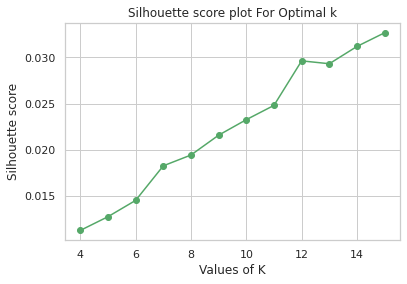

In [27]:
def findBestN(matrix):
  silhouettescore_avg = []
  range_n_cluters = [4,5,6,7,8,9,10,11,12,13,14,15]
  for n in range_n_cluters:
    kmeans = KMeans(n_clusters= n, n_init= 20, random_state=0)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(matrix,clusters)
    print('For n_cluters =', n, 'The average silhouette_score is :', silhouette_avg)
    silhouettescore_avg.append(silhouette_score(matrix, cluster_labels))
  plt.plot(range_n_cluters,silhouettescore_avg,'go-')
  plt.xlabel('Values of K')
  plt.ylabel('Silhouette score')
  plt.title('Silhouette score plot For Optimal k')
  plt.show()
findBestN(data_Description) 


Elbow Plot

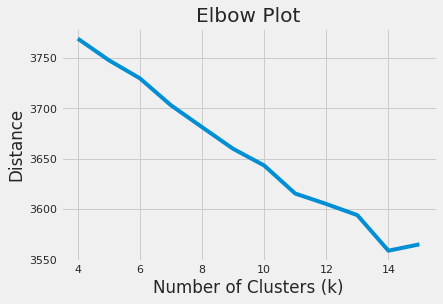

In [28]:
from sklearn import cluster
import matplotlib.style as style

range_n_cluters = [4,5,6,7,8,9,10,11,12,13,14,15]
avg_distance=[]
for n_clusters in range_n_cluters:
  cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(data_Description)
  avg_distance.append(cluster.inertia_)

style.use('fivethirtyeight')
plt.plot(range_n_cluters, avg_distance)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distance')
plt.title('Elbow Plot')
plt.show()

From the above Silhouette_score plot and Elbow Plot, it is reasonable to assume that number of clusters=12 is a decent value for the given data 

Performing K-Means clustering on the data to get the Product Categries

In [29]:
best_no_of_clusters = 12
kmeans = KMeans(n_clusters = best_no_of_clusters, n_init=20, random_state=0)
kmeans.fit(data_Description)
km_result=kmeans.predict(data_Description)
df_desc['cluster_group']=pd.Series(km_result)

df_desc.head(10)

,Description,cluster_group
0,hang heart light holder,8
1,metal lantern,6
2,cream cupid heart coat hanger,8
3,knit union flag hot water bottle,1
4,woolly hottie heart,8
5,babushka nesting box,10
6,glass star frost light holder,1
7,hand warmer union jack,1
8,hand warmer polka dot,1
9,assort colour bird ornament,1


In [30]:
kmeans.labels_

array([8, 6, 8, ..., 1, 8, 1], dtype=int32)

Products present in each Product Category

In [31]:
ProductType = df_desc.groupby(by=['cluster_group'])['Description'].unique()
print(ProductType.to_markdown())

|   cluster_group | Description                                                                |
|----------------:|:---------------------------------------------------------------------------|
|               0 | ['vintage head tail card game' 'vintage seaside jigsaw puzzle'             |
|                 |  'mini paint vintage' 'vintage billboard drink mug'                        |
|                 |  'vintage billboard love hate mug' 'bag vintage paisley'                   |
|                 |  'shopper vintage paisley' 'vintage snake ladder'                          |
|                 |  'vintage union jack cushion cover' 'plaster tin vintage paisley'          |
|                 |  'dinner tray vintage paisley' 'airline bag vintage tokyo'                 |
|                 |  'vintage snap card' 'boy vintage tin seaside bucket'                      |
|                 |  'girl vintage tin seaside bucket' 'vintage paisley stationery'            |
|                 |  'vintage 

Adding Product Categories as a New Column to original dataset

In [32]:
products_list = df['Description'].unique()

In [33]:
corresp=dict()
for key,val in zip (products_list,km_result):
  corresp[key]=val

df['product_categ']= df.loc[:,'Description'].map(corresp)

In [34]:
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,product_categ
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,8
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,1


As we have calculated the product categories(similarity b/w products),we will now use the product category data to group the customers into different clusters

Doing oneHotEncoding for the 'product category' column

In [35]:
Prod_Category = pd.get_dummies(df['product_categ'],prefix = 'prod_categ')
print(Prod_Category.shape)
Prod_Category.head()

(406829, 12)


,prod_categ_0,prod_categ_1,prod_categ_2,prod_categ_3,prod_categ_4,prod_categ_5,prod_categ_6,prod_categ_7,prod_categ_8,prod_categ_9,prod_categ_10,prod_categ_11
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


Adding the 'product category' columns to the original dataset

In [36]:
df=pd.concat([df,Prod_Category],axis=1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,product_categ,prod_categ_0,...,prod_categ_2,prod_categ_3,prod_categ_4,prod_categ_5,prod_categ_6,prod_categ_7,prod_categ_8,prod_categ_9,prod_categ_10,prod_categ_11
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,8,0,...,0,0,0,0,0,0,1,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,6,0,...,0,0,0,0,1,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,8,0,...,0,0,0,0,0,0,1,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,0,...,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,8,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
df_customer = df.copy(deep = True)
df_customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,product_categ,prod_categ_0,...,prod_categ_2,prod_categ_3,prod_categ_4,prod_categ_5,prod_categ_6,prod_categ_7,prod_categ_8,prod_categ_9,prod_categ_10,prod_categ_11
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,8,0,...,0,0,0,0,0,0,1,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,6,0,...,0,0,0,0,1,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,8,0,...,0,0,0,0,0,0,1,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,0,...,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,8,0,...,0,0,0,0,0,0,1,0,0,0


Dropping number of rows with unit price as zero(0)

In [38]:
df_customer = df_customer[df_customer['UnitPrice'] != 0]

Dropping rows with negative quantity

In [39]:
df_customer=df_customer[df_customer['Quantity'] > 0]

In [40]:
df_customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,product_categ,prod_categ_0,...,prod_categ_2,prod_categ_3,prod_categ_4,prod_categ_5,prod_categ_6,prod_categ_7,prod_categ_8,prod_categ_9,prod_categ_10,prod_categ_11
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,8,0,...,0,0,0,0,0,0,1,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,6,0,...,0,0,0,0,1,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,8,0,...,0,0,0,0,0,0,1,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,0,...,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,8,0,...,0,0,0,0,0,0,1,0,0,0


Dropping irrelevant columns for calculating customer clusters

In [41]:
df_customer = df_customer.drop(columns =['InvoiceNo','StockCode', 'product_categ', 'Quantity'])

In [42]:
df_customer.head()

,Description,InvoiceDate,UnitPrice,CustomerID,Country,prod_categ_0,prod_categ_1,prod_categ_2,prod_categ_3,prod_categ_4,prod_categ_5,prod_categ_6,prod_categ_7,prod_categ_8,prod_categ_9,prod_categ_10,prod_categ_11
0,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,0,0,0,0,0,0,0,1,0,0,0
1,WHITE METAL LANTERN,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,0,0,0,0,0,1,0,0,0,0,0
2,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,0,0,0,0,0,0,0,1,0,0,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,1,0,0,0,0,0,0,0,0,0,0
4,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,0,0,0,0,0,0,0,1,0,0,0


Grouping data using "Customer ID" to get a single row data for each customer 

In [43]:
trans1 = df_customer.groupby(by=['CustomerID']).mean()
trans1

,UnitPrice,prod_categ_0,prod_categ_1,prod_categ_2,prod_categ_3,prod_categ_4,prod_categ_5,prod_categ_6,prod_categ_7,prod_categ_8,prod_categ_9,prod_categ_10,prod_categ_11
CustomerID,,,,,,,,,,,,,
12346.0,1.040000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,2.644011,0.159341,0.670330,0.000000,0.0,0.032967,0.010989,0.005495,0.021978,0.054945,0.005495,0.032967,0.005495
12348.0,5.764839,0.000000,0.774194,0.000000,0.0,0.032258,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.064516
12349.0,8.289041,0.082192,0.452055,0.013699,0.0,0.164384,0.013699,0.013699,0.000000,0.136986,0.082192,0.041096,0.000000
12350.0,3.841176,0.058824,0.529412,0.000000,0.0,0.058824,0.117647,0.176471,0.000000,0.000000,0.000000,0.058824,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,4.765000,0.100000,0.800000,0.000000,0.0,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18281.0,5.622857,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18282.0,5.199167,0.083333,0.833333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333


In [44]:
customer_seg = np.array(trans1)
customer_seg

array([[1.04000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.64401099e+00, 1.59340659e-01, 6.70329670e-01, ...,
        5.49450549e-03, 3.29670330e-02, 5.49450549e-03],
       [5.76483871e+00, 0.00000000e+00, 7.74193548e-01, ...,
        6.45161290e-02, 0.00000000e+00, 6.45161290e-02],
       ...,
       [5.19916667e+00, 8.33333333e-02, 8.33333333e-01, ...,
        0.00000000e+00, 0.00000000e+00, 8.33333333e-02],
       [1.61498677e+00, 7.67195767e-02, 4.60317460e-01, ...,
        1.69312169e-01, 2.24867725e-02, 8.20105820e-02],
       [1.49357143e+00, 0.00000000e+00, 5.71428571e-01, ...,
        4.28571429e-02, 7.14285714e-02, 1.28571429e-01]])

Scaling the data

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(customer_seg)
scaled_matrix=scaler.transform(customer_seg)
scaled_matrix

array([[4.51308487e-04, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.24030442e-03, 1.59340659e-01, 6.70329670e-01, ...,
        6.86813187e-03, 3.29670330e-02, 5.49450549e-03],
       [2.77540637e-03, 0.00000000e+00, 7.74193548e-01, ...,
        8.06451613e-02, 0.00000000e+00, 6.45161290e-02],
       ...,
       [2.49715831e-03, 8.33333333e-02, 8.33333333e-01, ...,
        0.00000000e+00, 0.00000000e+00, 8.33333333e-02],
       [7.34138362e-04, 7.67195767e-02, 4.60317460e-01, ...,
        2.11640212e-01, 2.24867725e-02, 8.20105820e-02],
       [6.74415447e-04, 0.00000000e+00, 5.71428571e-01, ...,
        5.35714286e-02, 7.14285714e-02, 1.28571429e-01]])

Calculating silhouette_score

For n_cluters = 3 The average silhouette_score is : 0.1858853697545087
For n_cluters = 4 The average silhouette_score is : 0.18953374389430724
For n_cluters = 5 The average silhouette_score is : 0.2017178282778699
For n_cluters = 6 The average silhouette_score is : 0.21302400510053365
For n_cluters = 7 The average silhouette_score is : 0.15680222348560233
For n_cluters = 8 The average silhouette_score is : 0.15899593968925926
For n_cluters = 9 The average silhouette_score is : 0.1621416433128784
For n_cluters = 10 The average silhouette_score is : 0.16325640588459378
For n_cluters = 11 The average silhouette_score is : 0.1723974286993485
For n_cluters = 12 The average silhouette_score is : 0.16070841075507614
For n_cluters = 13 The average silhouette_score is : 0.1661240341873157
For n_cluters = 14 The average silhouette_score is : 0.16834292866979256
For n_cluters = 15 The average silhouette_score is : 0.16897057821643915


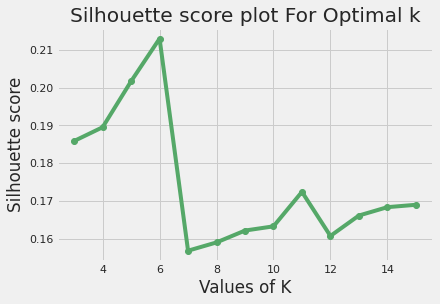

In [46]:
def findBestN(matrix):
  silhouettescore_avg = []
  range_n_cluters = [3,4,5,6,7,8,9,10,11,12,13,14,15]
  for n in range_n_cluters:
    kmeans = KMeans(n_clusters= n, n_init= 20, random_state=0)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(matrix,clusters)
    print('For n_cluters =', n, 'The average silhouette_score is :', silhouette_avg)
    silhouettescore_avg.append(silhouette_score(matrix, cluster_labels))
  plt.plot(range_n_cluters,silhouettescore_avg,'go-')
  plt.xlabel('Values of K')
  plt.ylabel('Silhouette score')
  plt.title('Silhouette score plot For Optimal k')
  plt.show()
findBestN(scaled_matrix) 

Elbow plot

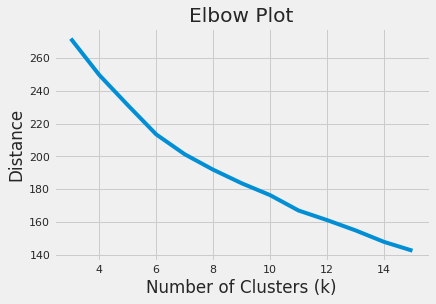

In [47]:
from sklearn import cluster
import matplotlib.style as style

range_n_cluters = [3,4,5,6,7,8,9,10,11,12,13,14,15]
avg_distance=[]
for n_clusters in range_n_cluters:
  cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(scaled_matrix)
  avg_distance.append(cluster.inertia_)

style.use('fivethirtyeight')
plt.plot(range_n_cluters, avg_distance)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distance')
plt.title('Elbow Plot')
plt.show()

From the above plots it is reasonable to assume that number of clusters = 6 is a decent value 

Performinf K-means clustering to get customer clusters from the data

In [48]:
best_no_of_clusters=6
kmeans_c = KMeans(n_clusters = best_no_of_clusters, n_init=20, random_state=0)
kmeans_c.fit(scaled_matrix)
kmc_result=kmeans_c.predict(scaled_matrix)


In [49]:
kmeans_c.labels_

array([5, 1, 5, ..., 5, 2, 1], dtype=int32)

No. of customers in each cluster

In [50]:
pd.DataFrame(pd.Series(kmc_result).value_counts(),columns=['no. of customers']).T

,1,5,2,4,0,3
no. of customers,2248,793,472,415,275,135


In [51]:
df=df[df['UnitPrice'] !=0]

In [52]:
df=df[df['Quantity']>0]

Adding customer category data into the original dataset

In [53]:
customers_list=df['CustomerID'].unique()

In [54]:
corresp_c= dict()
for key, val in zip (customers_list, kmc_result):
  corresp_c[key]= val
df['customer_category']=df.loc[:,'CustomerID'].map(corresp_c)

In [55]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,product_categ,prod_categ_0,...,prod_categ_3,prod_categ_4,prod_categ_5,prod_categ_6,prod_categ_7,prod_categ_8,prod_categ_9,prod_categ_10,prod_categ_11,customer_category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,8,0,...,0,0,0,0,0,1,0,0,0,5
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,6,0,...,0,0,0,1,0,0,0,0,0,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,8,0,...,0,0,0,0,0,1,0,0,0,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,0,...,0,0,0,0,0,0,0,0,0,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,8,0,...,0,0,0,0,0,1,0,0,0,5


In [67]:
AvgUnitPrice=df.groupby(by=['customer_category'])['UnitPrice'].mean()
AvgUnitPrice

customer_category
0    3.998396
1    3.038552
2    2.979051
3    2.952114
4    3.015114
5    3.129364
Name: UnitPrice, dtype: float64

Plotting AvgUnitPrice Vs customer category

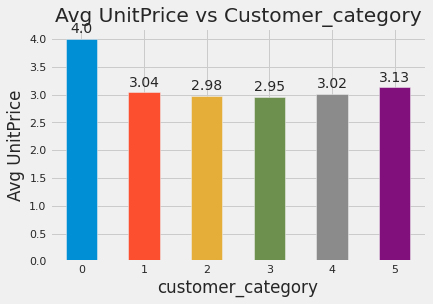

In [69]:
from matplotlib import patches
#df.set_index('customer_category',inplace=True)
ax1=df.groupby(by=['customer_category'])['UnitPrice'].mean().plot(kind='bar',color=['C0','C1','C2','C3','C4','C5'])
for p in ax1.patches:
  ax1.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Avg UnitPrice vs Customer_category')
plt.ylabel('Avg UnitPrice')
plt.xticks(rotation = 0)
plt.show()

from the graph it is known that the avg unit price is high for category 0 and low for category 3

In [59]:
AvgQuantityprod=df.groupby(by=['customer_category'])['Quantity'].mean()
AvgQuantityprod.astype(int)

customer_category
0     9
1    12
2    16
3    11
4    12
5    14
Name: Quantity, dtype: int64

plotting avg quantity of products v/s customer Category

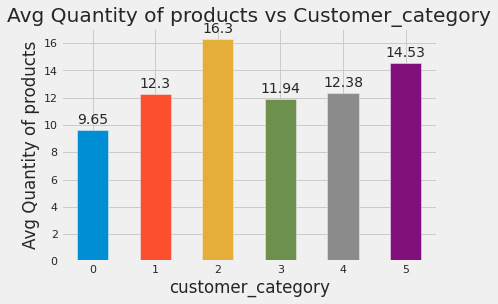

In [64]:
from matplotlib import patches

ax2=df.groupby(by=['customer_category'])['Quantity'].mean().plot(kind='bar',color=['C0','C1','C2','C3','C4','C5'])
for p in ax2.patches:
  ax2.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Avg Quantity of products vs Customer_category')
plt.ylabel('Avg Quantity of products')
plt.xticks(rotation = 0)
plt.show()

From the above graph avg quantity of products per cluster is high in category 2 and low in category 0

Adding a new column TotalPrice which is product of UnitPrice with Quantity

In [72]:
df['TotalPrice']= df['UnitPrice'] * df['Quantity']

In [74]:
AvgTotalPrice=df.groupby(by=['customer_category'])['TotalPrice'].mean()
AvgTotalPrice

customer_category
0    16.754748
1    22.335991
2    25.502460
3    20.947474
4    20.741661
5    23.771955
Name: TotalPrice, dtype: float64

Plotting AvgTotalPrice VS Custmer Category

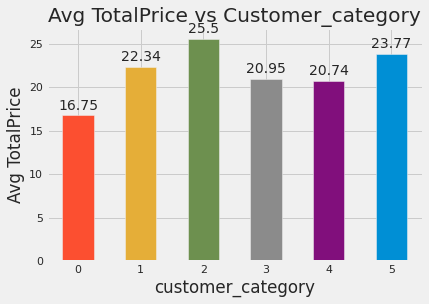

In [78]:
from matplotlib import patches
ax3=df.groupby(by=['customer_category'])['TotalPrice'].mean().plot(kind='bar',color=['C1','C2','C3','C4','C5','C0'])
for p in ax3.patches:
  ax3.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='center',xytext=(0,10),textcoords='offset points')
plt.title('Avg TotalPrice vs Customer_category')
plt.ylabel('Avg TotalPrice')
plt.xticks(rotation = 0)
plt.show()

Avg Total Price is high for Category 2 and low for category 0

In [79]:
ProdCat = df.groupby(by=['customer_category'])['product_categ'].unique()
ProdCat

customer_category
0       [9, 1, 10, 8, 11, 0, 6, 4, 5, 7, 2]
1    [1, 10, 8, 6, 9, 11, 4, 5, 7, 0, 2, 3]
2    [11, 1, 8, 7, 0, 4, 5, 2, 10, 9, 6, 3]
3       [9, 8, 1, 4, 10, 6, 5, 0, 11, 7, 2]
4    [1, 0, 4, 5, 6, 10, 8, 3, 7, 9, 11, 2]
5    [8, 6, 1, 10, 0, 4, 9, 5, 11, 7, 2, 3]
Name: product_categ, dtype: object

Customer categories 1,2,4,5 contains all 12 products categories 1 and 3 contains only 11 products categories

This segmentation will help in coming up with dedicated marketing strategies like Targeted Ads, Targeted Discounts, Special offers and giving product recommendations to different user bases

**Conclusion:**


*   From the data, only unique values from the product description column were taken and NLP techniques were applied to convert to numerical data

*   Then K-Means clustering is applied and used Silhouette_score plot and elbow curve to determine the value of K as 12

*   List of all products present in the 12 products categories are also shown

*   Then using the categories customers were grouped into different clusters using similarity between purchased products between the users

*   i have grouped the data using Customer Id to get a single row data for each customer
*   Then K-Means clustering is applies and used silhouette score plot and elbow curve to determine the value of K=6 as a reasonable value for customer categories(clusters)

*   Data vizualization is performed to get values like avg unit price per cluster,avg quantity of products per cluster and the product categories present in each customer category is also shown
*   Creating customer segmentation will help in coming up with dedicated marketing strategies like Targeted discounts, Targeted Ads , spcl offers and will aid us in recommending products to different user bases







